In [161]:
from hsdfmpm.hsdfm import HyperspectralImage
import matplotlib.pyplot as plt
import numpy as np
from hsdfmpm.hsdfm.utils import find_cycles
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile

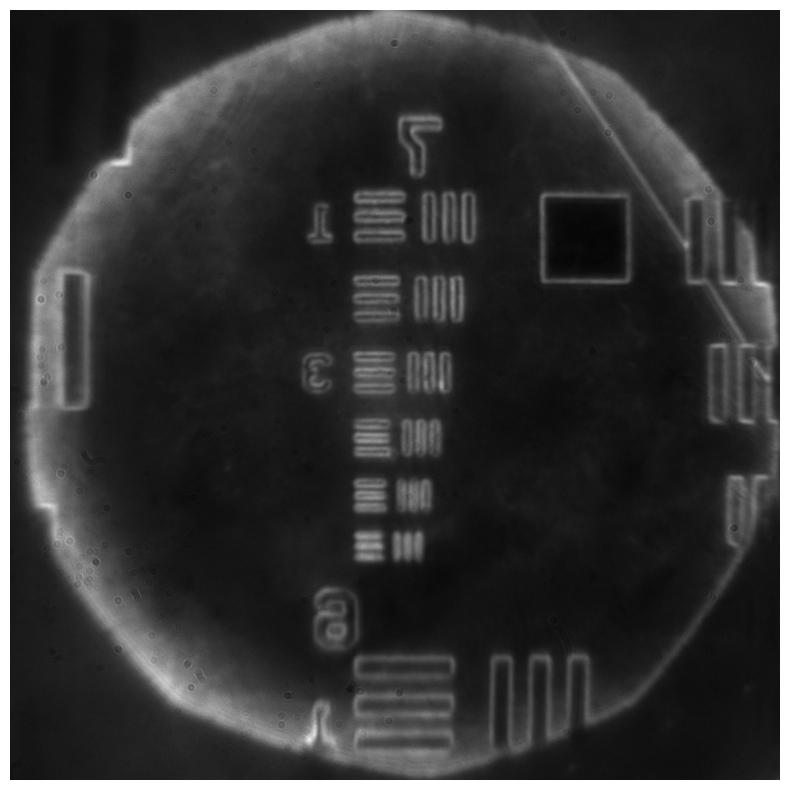

In [209]:
target_path = r'C:\Users\jdivers\Desktop\df'
standard_path = r'C:\Users\jdivers\Desktop\std'
background_paths = find_cycles(r'D:\Jesse\hsdfmpm_poc\Background')

standard = HyperspectralImage(image_path=standard_path, metadata_ext='MetaData.json', image_ext=".tif", wavelengths=[500, 550, 600, 650])
standard.normalize_integration_time()

target = HyperspectralImage(image_path=target_path, standard=standard, metadata_ext='MetaData.json',  image_ext=".tif", wavelengths=standard.metadata['Wavelength'])
target.normalize_integration_time()
img = np.nansum(target / standard, axis=0)

fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

tifffile.imwrite(r'C:\Users\jdivers\Desktop\df_comparison figures\old_df\summed_volume.tif', img)

In [210]:
def pixels_count_to_scalebar(count, lp_mm):
    return 1000 / lp_mm / count

In [211]:
scale = pixels_count_to_scalebar(230 / 2.5, 71.8)

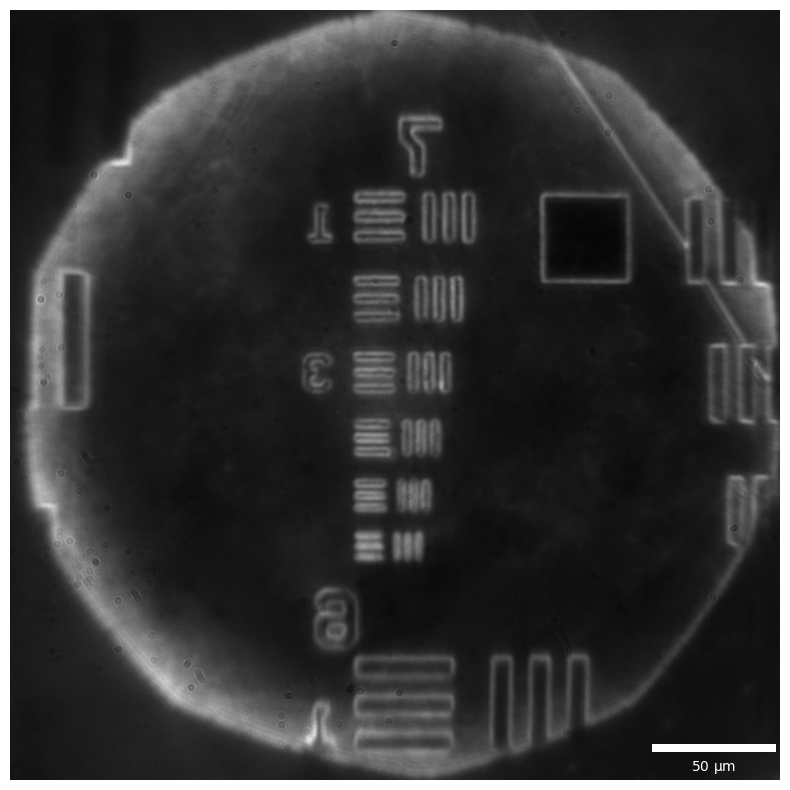

In [212]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, cmap='gray')
scalebar = ScaleBar(scale, 'um', location='lower right', frameon=False, color='white')
ax.add_artist(scalebar)
ax.axis('off')
plt.show()
fig.savefig(r'C:\Users\jdivers\Desktop\df_comparison figures\old_df\summed_usaf_w_scalebar.png')

In [202]:
from scipy.ndimage import sobel

def map_edges(image):
    dx = sobel(image, axis=0)
    dy = sobel(image, axis=1)
    grad_image = np.hypot(dx, dy)
    return grad_image

grad_img = map_edges(img)
print(f'Contrast of edges = {grad_img.mean()} pm {grad_img.std()}')


Contrast of edges = 2.7285491786682234 pm 2.082071209210888


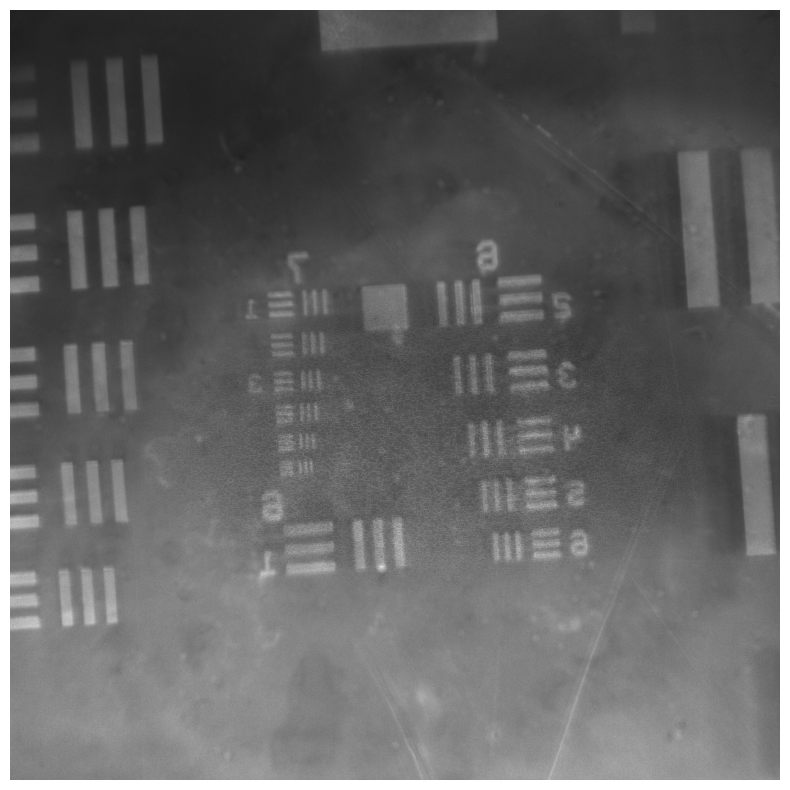

In [221]:
target_path = r'F:\Jesse\new_df\05052025\less_oblique_usaf_target\unpoalrized\cycle1'
standard_paths = find_cycles(r'F:\Jesse\new_df\04242025\standard_080_full_power\unpolarized')

standard = HyperspectralImage(image_path=standard_path, metadata_ext='MetaData.json', image_ext=".tif", wavelengths=[500, 550, 600, 650])
standard.normalize_integration_time()

target = HyperspectralImage(image_path=target_path, standard=standard, wavelengths=standard.metadata['Wavelength'])
target.normalize_integration_time()
img = np.flip(np.nansum(target / standard, axis=0))

fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

tifffile.imwrite(r'C:\Users\jdivers\Desktop\df_comparison figures\new_df\summed_volume.tif', img)

In [222]:
grad_img = map_edges(img)
print(f'Contrast of edges = {grad_img.mean()} pm {grad_img.std()}')


Contrast of edges = 9.463017275038046 pm 7.83753274654617


In [225]:
scale = pixels_count_to_scalebar(118 / 2.5, 71.8)

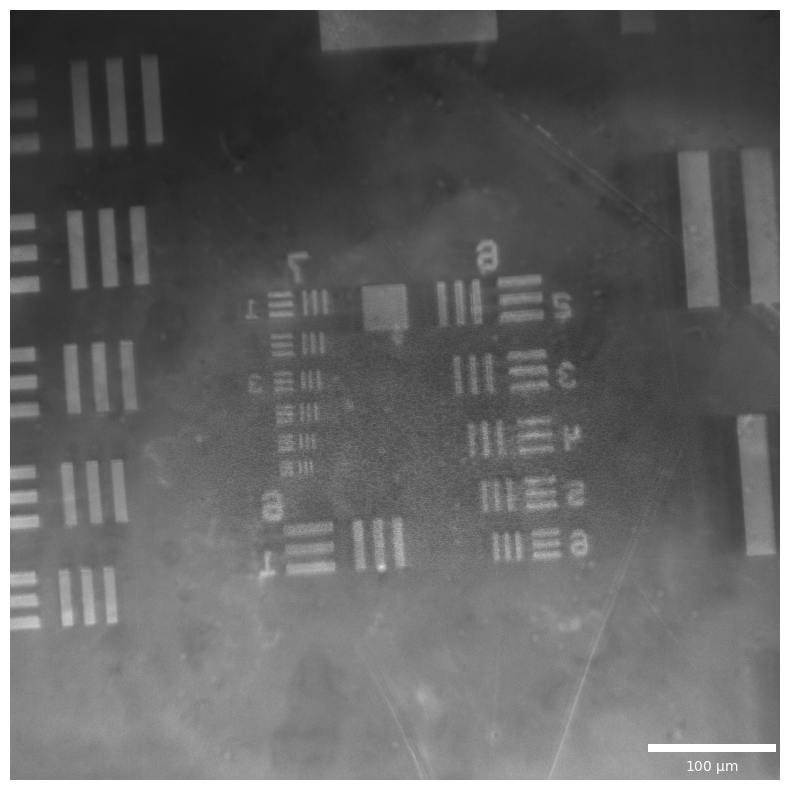

In [226]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, cmap='gray')
scalebar = ScaleBar(scale, 'um', location='lower right', frameon=False, color='white')
ax.add_artist(scalebar)
ax.axis('off')
plt.show()
fig.savefig(r'C:\Users\jdivers\Desktop\df_comparison figures\old_df\summed_usaf_w_scalebar.png')

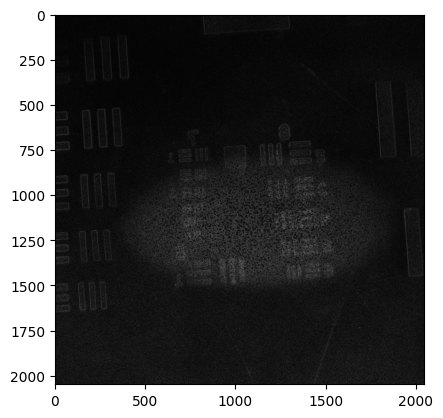

In [223]:
plt.imshow(grad_img, cmap='gray')

In [203]:
standard = HyperspectralImage(image_path=standard_path, metadata_ext='MetaData.json', image_ext=".tif", wavelengths=[500, 550, 600, 650])
standard.normalize_integration_time()

animal = HyperspectralImage(image_path=r'F:\Jesse\old_df\03282025\1675RT\fov1\100\cycle1', standard=standard, wavelengths=standard.metadata['Wavelength'])
animal.normalize_integration_time()

img = np.nansum(animal / standard, axis=0)

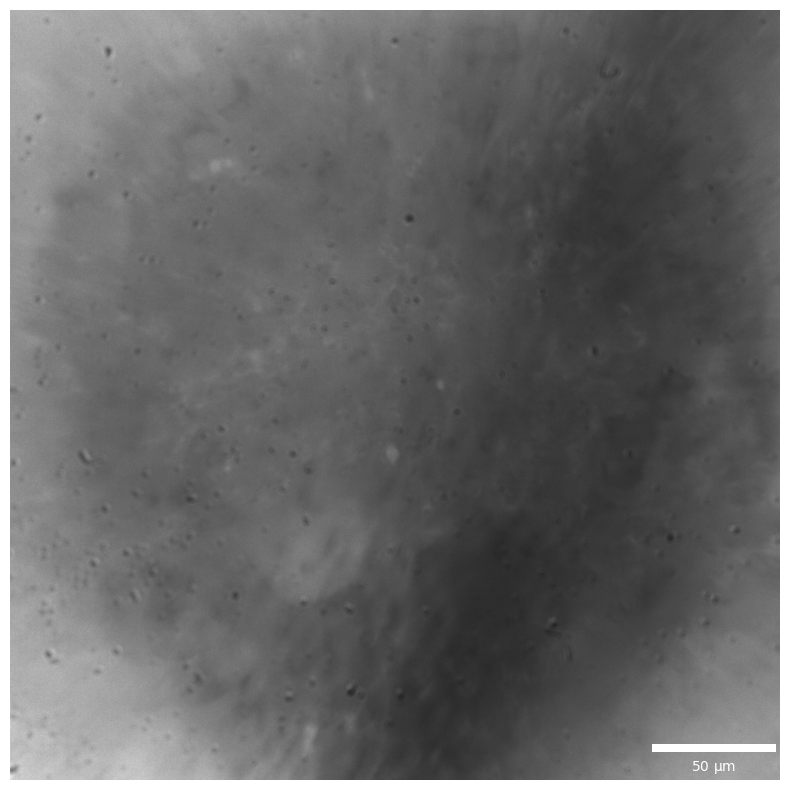

In [204]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, cmap='gray')
ax.axis('off')
scalebar = ScaleBar(scale, 'um', location='lower right', frameon=False, color='white')
ax.add_artist(scalebar)
plt.show()

In [205]:
img.std()

np.float64(6.983105486076709)

Contrast of edges = 4.16717966864022 pm 0.0019782143558013466


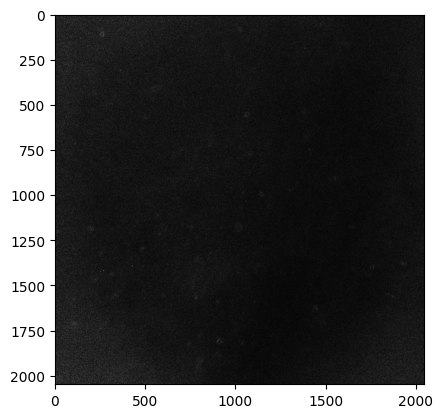

In [207]:
grad_img = map_edges(img)
print(f'Contrast of edges = {grad_img.mean()} pm {grad_img.min()}')
plt.imshow(grad_img, cmap='gray')